<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

### Data Loading

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

In [2]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

fatal: destination path 'Medicines-and-Common-Treatment-Recommendation-System' already exists and is not an empty directory.


In [3]:
!ls Medicines-and-Common-Treatment-Recommendation-System/Drugscom

 drugsComTest_raw.tsv   drugsComTrain_raw.tsv  'drugscom train treatments.xlsx'


In [4]:
#Loading Data
Drugscom_train = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom/drugsComTrain_raw.tsv',sep='\t',parse_dates=['date'])
Drugscom_test = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom/drugsComTest_raw.tsv',sep='\t',parse_dates=['date'])

In [5]:
#Data set shape
print("Drugscom Train shape :" ,Drugscom_train.shape)
print("Drugscom Test shape :", Drugscom_test.shape)

Drugscom Train shape : (161297, 7)
Drugscom Test shape : (53766, 7)


Currently the size of the training and testing dataset is huge which is causing the processor to crash. Therefore reducing the training and test data to 65%

In [6]:
# Reducing the data to 65%

#Drugscom_train=Drugscom_train.head(56500)
#Drugscom_test=Drugscom_test.head(18818)

In [7]:
#Data information
print("Training Data information :")
Drugscom_train.info()

Training Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  float64       
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 8.6+ MB


In [8]:
print("Test Data information :")
Drugscom_test.info()

Test Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   53766 non-null  int64         
 1   drugName     53766 non-null  object        
 2   condition    53471 non-null  object        
 3   review       53766 non-null  object        
 4   rating       53766 non-null  float64       
 5   date         53766 non-null  datetime64[ns]
 6   usefulCount  53766 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.9+ MB


In [9]:
#Changing the "Unnamed: 0" column to uniqueId as it represents the unique id of the drugs
Drugscom_train=Drugscom_train.rename(columns={'Unnamed: 0' : 'uniqueId'})
Drugscom_test=Drugscom_test.rename(columns={'Unnamed: 0' : 'uniqueId'})

### Data Cleaning

#### 1. Checking for missing values

In [10]:
# Checking for training data null values
Drugscom_train.isnull().sum()

uniqueId         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

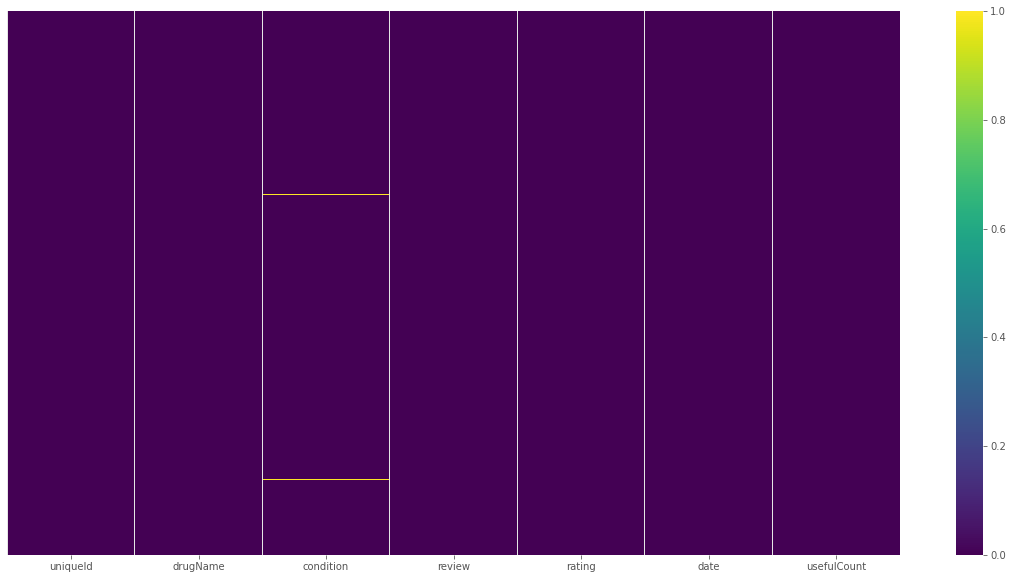

In [11]:
#visualization for training data null values(Visualization)
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Drugscom_train.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [12]:
# Checking for testing data null values
Drugscom_test.isnull().sum()

uniqueId         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

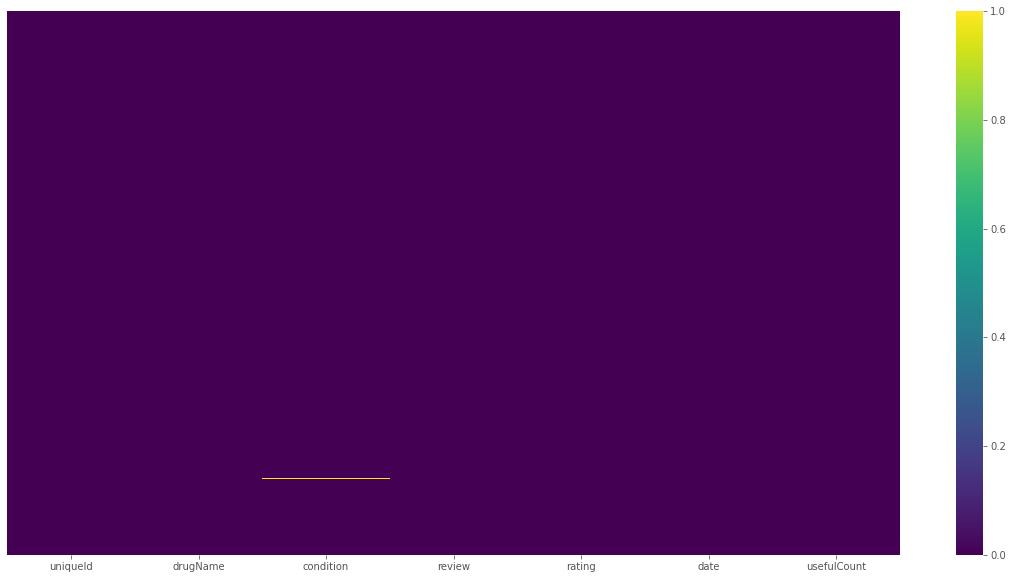

In [13]:
#visualization for testing data null values
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Drugscom_test.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

It seems both the training and testing data have null values. Dropping the null values.

In [14]:
# Dropping null values
Drugscom_train = Drugscom_train.dropna(axis=0)
Drugscom_test = Drugscom_test.dropna(axis=0)

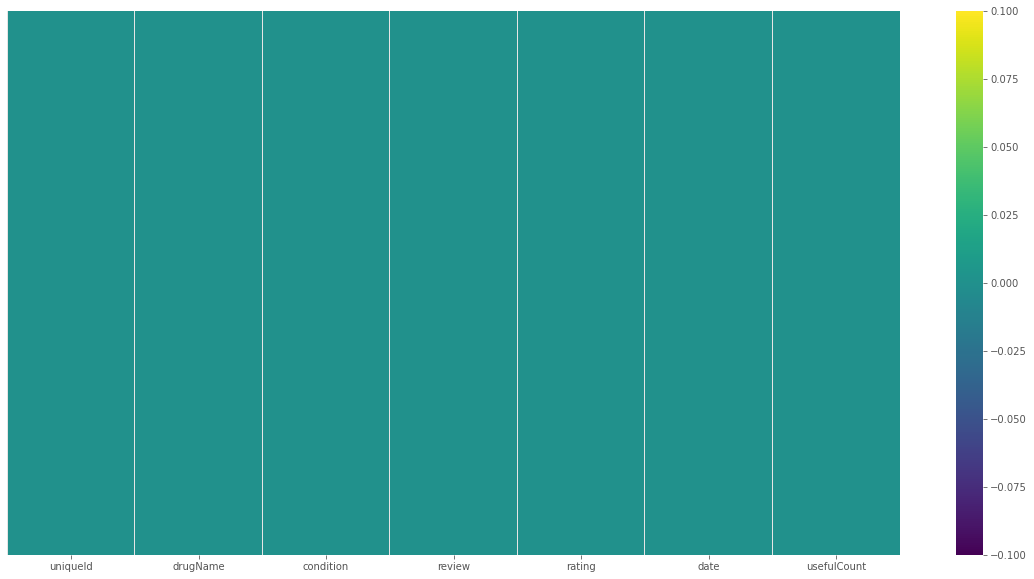

In [15]:
#visualization for training data null values
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Drugscom_train.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

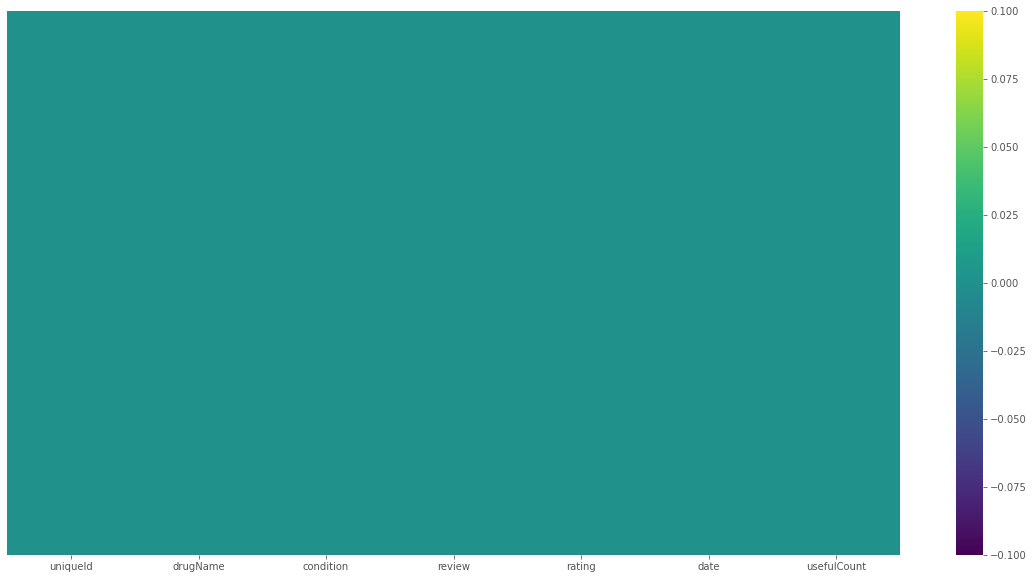

In [16]:
#visualization for testing data null values
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Drugscom_test.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

Now, there are no null values present in the training and testing data.

#### 2. Conditions Preprocessing 

Looking into the conditions column

In [17]:
# Conditions for training data
Drugscom_train.condition.sort_values()

5145      0</span> users found this comment helpful.
12332     0</span> users found this comment helpful.
66462     0</span> users found this comment helpful.
24189     0</span> users found this comment helpful.
145909    0</span> users found this comment helpful.
                             ...                    
154936                                   zen Shoulde
126916                                   zen Shoulde
49920                                    zen Shoulde
149704                                   zen Shoulde
113572                                   zen Shoulde
Name: condition, Length: 160398, dtype: object

From above output we can see that there are some irrelevant conditions such as "0 < /span> users found this comment helpful.", which are not useful for recommednation system. Therefore, removing such conditions from the data.

In [18]:
def eliminate_span(df):
  # getting the index of data
  index_list = set(df.index)
  # Below list will store the index for the conditions that </span> in it.
  spanlist = []
  for i,j in enumerate(df['condition']):
      if '</span>' in j:
          spanlist.append(i)

  #Creating new index list that does not contain the spanlist indexes.
  new_idx_list = index_list.difference(set(spanlist))
  df = df.loc[list(new_idx_list)].reset_index()
  del df['index']
  return df

In [19]:
Drugscom_train=eliminate_span(Drugscom_train)
Drugscom_test=eliminate_span(Drugscom_test)

Now checking for the conditions that contains only one drug.

In [20]:
 pd.DataFrame(Drugscom_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)).reset_index().tail(20)

,condition,drugName
864,Muscle Twitching,1
865,Keratitis,1
866,Joint Infection,1
867,ge HCT (amlodipine / hydrochlorothiazide / val...,1
868,Hypercalcemia,1
869,Hepatitis B Prevention,1
870,ibrocystic Breast Disease,1
871,Histoplasmosis,1
872,Hodgkin's Lymphoma,1
873,Hydrocephalus,1


We will  remove the conditions that have only one drug available as recommendation system will recommend the same medicine and it won't be based on the customer reviews.

In [21]:
def eliminate_single_drug(df):

  df_single_drug=pd.DataFrame(df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False))
  df_single_drug=df_single_drug.reset_index()

  df_single_condition=df_single_drug[df_single_drug['drugName']== 1]
  df_single_condition=df_single_condition.reset_index()

  # getting the index of data
  index_list=set(df.index)

  # Below list will store the index for the conditions that have single drug
  cond_list=[]

  for i,j in enumerate(df['condition']):
    for c in list(df_single_condition['condition']):
        if j == c:
            cond_list.append(i)
  #Creating new index list that does not contain the spanlist indexes.
  new_idx_list = index_list.difference(set(cond_list))
  df = df.loc[list(new_idx_list)].reset_index()
  del df['index']
  return df

In [22]:
Drugscom_train=eliminate_single_drug(Drugscom_train)
Drugscom_test=eliminate_single_drug(Drugscom_test)


In [23]:
#New dataframe size 

#Data set shape
print("Drugscom Train shape :" ,Drugscom_train.shape)
print("Drugscom Test shape :", Drugscom_test.shape)

Drugscom Train shape : (158923, 7)
Drugscom Test shape : (52850, 7)


#### 3. Reviews Preprocessing

In [24]:
#Loading additional libraties
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop_words=set(stopwords.words('english'))

There are also terms that contain the word "not," such as "needn't." Since these terms are essential components of emotional analysis, we will delete them from the list of stopwords.

In [26]:
remove_stopwords = ["isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't","aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't"]
for i in remove_stopwords:
    stop_words.remove(i)

##### Stemming 



Stemming is the process of reducing a word to its base word or stem in such a manner that related words are grouped together under a single stem. Here, I am using snowball stemmer from nltk also known as Porter2 stemmer which is a better version of Porter Stemmer.

In [27]:
stemmer = SnowballStemmer('english')

In [28]:
def clean_review(review):


    # Delete html content 
    text = BeautifulSoup(review, 'html.parser').get_text()

    # inserting space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # changing into lower case
    text = text.lower().split()

    # removing stopwords 
    text = [w for w in text if not w in stop_words]

    # stemming words
    stem_words = [stemmer.stem(w) for w in text]

    # joining words with space
    stem_words=' '.join(stem_words)

    return stem_words

In [29]:
Drugscom_train['clean_review']=Drugscom_train['review'].apply(clean_review)
Drugscom_test['clean_review']=Drugscom_test['review'].apply(clean_review)

In [30]:
#Saving preprocessed training and testing data to github repository
Drugscom_train.to_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom_train.csv')
Drugscom_test.to_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom_test.csv')

In [31]:
ls Medicines-and-Common-Treatment-Recommendation-System/


'Druglib_com Data Exploration.ipynb'   Drugscom_train.csv
 Druglib_com.ipynb                     DrugsLib/
 Drugscom/                             README.md
 Drugscom_data_exploration.ipynb       Webmd_Data_Exploration.ipynb
 Drugscom_test.csv
